Create prediction and expectation json files

In [2]:
import json

In [3]:
def write_json(new_data, filename='pdf_metadata.json', category = 'Papers'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data[category].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [9]:
file = 'prediction.json'
with open(file) as json_file:
    data = json.load(json_file)
 
    # Print the type of data variable
    print("Type:", type(data))
 
    # Print the data of dictionary
    print(len(data['References']))

Type: <class 'dict'>
3


In [7]:
# for i in range(len(data['References'])):
#     print(len(data['References'][i]))

17
56
96


In [8]:
# predictions = data['References'][0]
# write_json(predictions, filename='prediction.json', category='References')

Compate predictions and exectations

In [10]:
prediction_file = 'prediction.json'
expectation_file = 'expectation.json'

with open(prediction_file) as json_prediction:
    prediction = json.load(json_prediction)
 
    # Print the type of data variable
    print("Type:", type(prediction))
 
    # Print the data of dictionary
    print("predictions : "+str(len(prediction['References'])))

with open(expectation_file) as json_expectation:
    expectation = json.load(json_expectation)
 
    # Print the type of data variable
    print("Type:", type(expectation))
 
    # Print the data of dictionary
    print("expectations : "+str(len(expectation['References'])))

Type: <class 'dict'>
predictions : 3
Type: <class 'dict'>
expectations : 3


In [11]:
predictions = prediction['References']
expectations = expectation['References']

In [12]:
# lists to compare
list_predictions = []
list_expectations = []
for num in [0,1,2]:
    for pred in predictions[num]:
        list_predictions.append(pred['list_authors'])
    for exp in expectations[num]:
        list_expectations.append(exp['list_authors'])

In [13]:
list_predictions == list_expectations

False

In [14]:
len(list_predictions) == len(list_expectations)

True

In [15]:
len(list_predictions)

169

In [16]:
import numpy as np

Comparer le nombre d'auteurs extraits

In [36]:
num_predictions = []
for pred in list_predictions:
    num_predictions.append(len(pred))
prediction_array = np.array(num_predictions)

num_expectations = []
for pred in list_expectations:
    num_expectations.append(len(pred))
expectation_array = np.array(num_expectations)

# metriques statistique
diff_abs = np.absolute(prediction_array - expectation_array)
diff = prediction_array - expectation_array


mse = (np.square(diff)).mean(axis=None)
rmse = np.sqrt(((diff) ** 2).mean())

print("la moeynne d'écart du nombre d'auteurs extraits est :", np.mean(diff_abs))
print('MSE :', mse)
print("RMSE : ", rmse)

la moeynne d'écart du nombre d'auteurs extraits est : 1.272189349112426
MSE : 3.63905325443787
RMSE :  1.9076302719441915


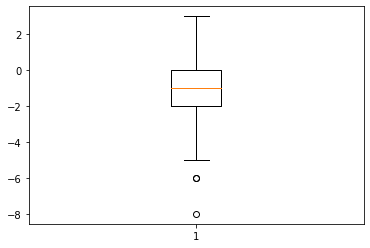

In [39]:
import matplotlib.pyplot as plt

plt.boxplot(diff)

# plt.ylim(0,10)

plt.savefig('SimpleBoxPlot.png')
plt.show()

-1.1538461538461537